In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [68]:
df = pd.read_csv("archive (1)/UberDataset.csv")

In [69]:
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [70]:
df = df.drop(columns=['START', 'STOP'])

In [71]:
df.head()

,START_DATE,END_DATE,CATEGORY,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,63.7,Customer Visit


In [72]:
df = df.drop(columns=['START_DATE', 'END_DATE'])

In [73]:
df.head()

,CATEGORY,MILES,PURPOSE
0,Business,5.1,Meal/Entertain
1,Business,5.0,NaN
2,Business,4.8,Errand/Supplies
3,Business,4.7,Meeting
4,Business,63.7,Customer Visit


In [74]:
df.describe()

,MILES
count,1156.000000
mean,21.115398
std,359.299007
min,0.500000
25%,2.900000
50%,6.000000
75%,10.400000
max,12204.700000


In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   CATEGORY  1155 non-null   object 
 1   MILES     1156 non-null   float64
 2   PURPOSE   653 non-null    object 
dtypes: float64(1), object(2)
memory usage: 27.2+ KB


In [76]:
df.isnull().sum()

CATEGORY      1
MILES         0
PURPOSE     503
dtype: int64

In [77]:
df = df.drop(columns=['PURPOSE'])

In [78]:
df.head()

,CATEGORY,MILES
0,Business,5.1
1,Business,5.0
2,Business,4.8
3,Business,4.7
4,Business,63.7


In [79]:
from sklearn.preprocessing import LabelEncoder

In [80]:
LabelHot = LabelEncoder()

In [81]:
df['CATEGORY'] = LabelHot.fit_transform(df['CATEGORY'])

In [82]:
mapping = dict(zip(LabelHot.classes_, LabelHot.transform(LabelHot.classes_)))
print(mapping)

{'Business': 0, 'Personal': 1, nan: 2}


In [83]:
df.head()

,CATEGORY,MILES
0,0,5.1
1,0,5.0
2,0,4.8
3,0,4.7
4,0,63.7


In [84]:
df.corr()

,CATEGORY,MILES
CATEGORY,1.000000,0.220952
MILES,0.220952,1.000000


array([[<Axes: title={'center': 'CATEGORY'}>,
        <Axes: title={'center': 'MILES'}>]], dtype=object)

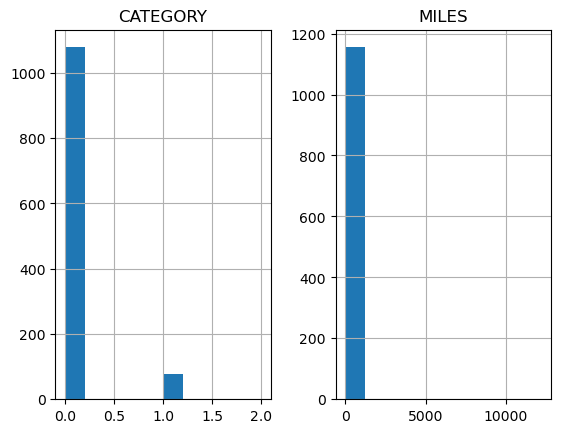

In [85]:
df.hist()

In [86]:
import pandas as pd

def calculate_price(df,miles_column):
    df.loc[df['CATEGORY'] == 0, 'Price INR'] = df['MILES'] * 5 * 90
    
    df.loc[df['CATEGORY'] != 0, 'Price INR'] = df['MILES'] * 7 * 90
    
    return df['Price INR']

In [87]:
df['Price INR'] = calculate_price(df, df['MILES'])

In [88]:
df.head()


,CATEGORY,MILES,Price INR
0,0,5.1,2295.0
1,0,5.0,2250.0
2,0,4.8,2160.0
3,0,4.7,2115.0
4,0,63.7,28665.0


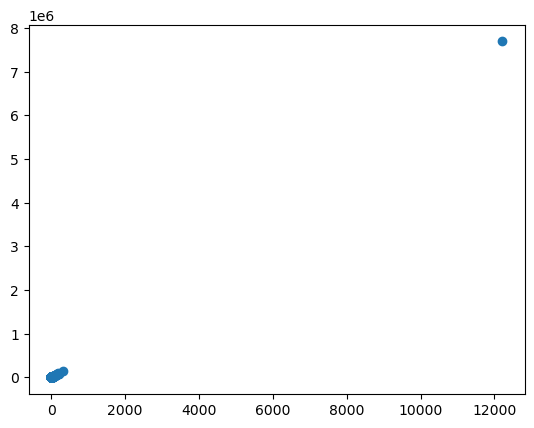

In [89]:
plt.scatter(df['MILES'],df['Price INR'])

In [90]:
import seaborn as sns

<Axes: xlabel='Price INR', ylabel='MILES'>

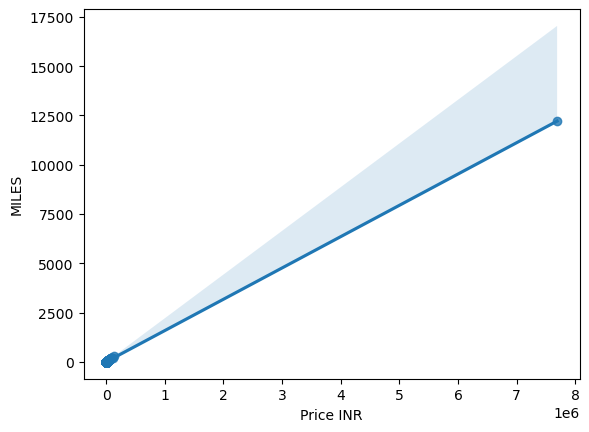

In [91]:
sns.regplot(x='Price INR',y='MILES',data=df)

## DATA BIFERCATION

In [92]:
df.head()

,CATEGORY,MILES,Price INR
0,0,5.1,2295.0
1,0,5.0,2250.0
2,0,4.8,2160.0
3,0,4.7,2115.0
4,0,63.7,28665.0


In [93]:
X = df.drop(columns=['Price INR'])

In [94]:
Y = df['Price INR']

In [95]:
X.head()

,CATEGORY,MILES
0,0,5.1
1,0,5.0
2,0,4.8
3,0,4.7
4,0,63.7


In [96]:
Y.head()

0     2295.0
1     2250.0
2     2160.0
3     2115.0
4    28665.0
Name: Price INR, dtype: float64

## TRAIN TEST SPILLITING

In [97]:
from sklearn.model_selection import train_test_split

In [98]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

In [99]:
X_train.head()

,CATEGORY,MILES
58,0,5.5
333,0,4.8
332,0,4.9
922,0,11.4
63,0,3.9


In [100]:
Y_train.head()

58     2475.0
333    2160.0
332    2205.0
922    5130.0
63     1755.0
Name: Price INR, dtype: float64

## MODEL TRAINING

In [101]:
from sklearn.linear_model import LinearRegression

In [102]:
Linear = LinearRegression()

In [103]:
Linear.fit(X_train,Y_train)

LinearRegression()

In [104]:
Linear.score(X_train, Y_train)

0.9997787612797937

In [105]:
Linear.coef_

array([2117.52075573,  629.32212878])

In [106]:
Linear.intercept_

-1918.8341666788583

In [107]:
# Linear.predict(X_test)

In [108]:
Linear.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

In [109]:
## PREDICTION OF THE MODEL

In [110]:
reg_pred = Linear.predict(X_test)

In [111]:
reg_pred

array([-9.37999932e+01,  1.20560200e+03,  6.95460785e+03,  9.83321809e+04,
       -1.56732206e+02,  2.36055631e+03,  8.46498096e+03,  1.42955023e+04,
        2.10882746e+03,  3.05281065e+03,  8.77964202e+03,  7.64686219e+03,
        1.26185070e+04,  5.50716695e+03,  2.86401401e+03,  5.82182802e+03,
        1.66830197e+03,  1.29070869e+03, -7.86054335e+02,  8.33911653e+03,
        4.75198040e+03, -1.54124089e+03, -1.22657983e+03,  2.21251740e+03,
        4.24852270e+03, -4.71393270e+02,  4.31145491e+03,  3.49333614e+03,
       -7.86054335e+02,  1.29070869e+03,  2.73814959e+03,  5.50716695e+03,
        6.19942129e+03,  2.36055631e+03,  1.98296303e+03, -9.74850974e+02,
        9.76047626e+02,  4.72589923e+02,  1.10452017e+04, -5.97257696e+02,
       -4.71393270e+02,  1.41657312e+03,  1.54243754e+03,  9.03137087e+03,
       -2.82596632e+02,  3.74506499e+03,  2.17175967e+03, -1.56732206e+02,
        8.87035524e+04, -5.97257696e+02,  2.83793284e+02,  1.16484426e+03,
        6.13648908e+03,  

In [112]:
## PLOT A SCATTER PLOT

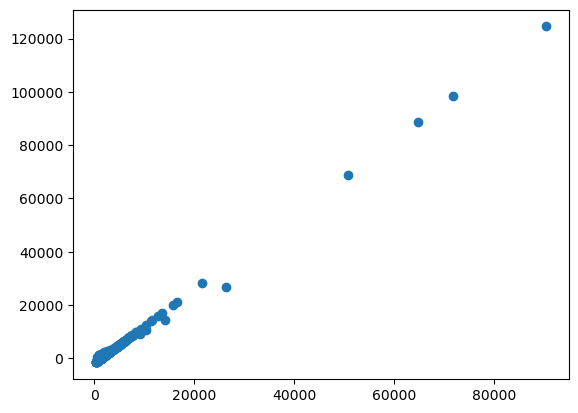

In [113]:
plt.scatter(Y_test,reg_pred)

In [114]:
## RESIDUALS
residuals = reg_pred-Y_test

In [115]:
residuals

940     -1398.799993
265       197.601995
109       609.607849
299     26647.180949
752     -1416.732206
            ...     
1133      161.302527
514     -1703.647612
380     -1470.528845
952     -1578.122122
1002      466.150146
Name: Price INR, Length: 232, dtype: float64

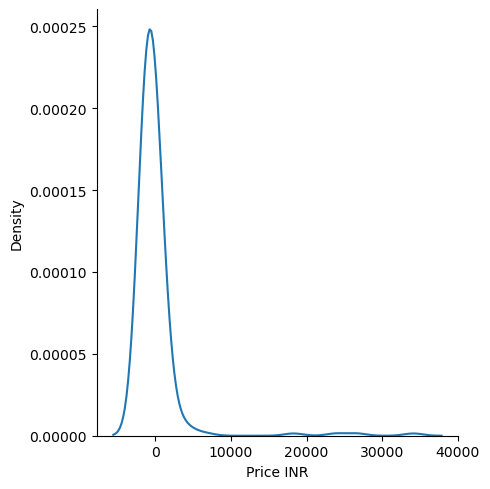

In [116]:
sns.displot(residuals,kind="kde")

In [117]:
## Sctter plot for prediction and residuals

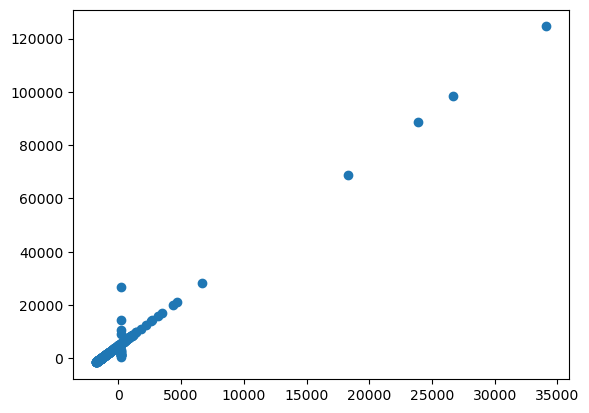

In [118]:
plt.scatter(residuals,reg_pred)

In [119]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [120]:
print(mean_absolute_error(Y_test,reg_pred))
print(mean_squared_error(Y_test,reg_pred))
print(np.sqrt(mean_squared_error(Y_test,reg_pred)))

1412.7886387536748
13550343.136150975
3681.0790722491924


In [121]:
## Adjusted R^2 and R^2

In [122]:
from sklearn.metrics import r2_score
score = r2_score(Y_test,reg_pred)
print(score)

0.8468301097070645


In [123]:
1-(1-score)*(len(Y_test)-1)/(len(Y_test)-X_test.shape[1]-1)

0.8454923814075629

## NEW DATA PREDICTION

In [124]:
X = X.to_numpy()

In [125]:
X

array([[0.00000e+00, 5.10000e+00],
       [0.00000e+00, 5.00000e+00],
       [0.00000e+00, 4.80000e+00],
       ...,
       [0.00000e+00, 6.40000e+00],
       [0.00000e+00, 4.82000e+01],
       [2.00000e+00, 1.22047e+04]])

In [126]:
X[0]

array([0. , 5.1])

In [127]:
X[0].reshape(1,-1)

array([[0. , 5.1]])

In [128]:
Linear.predict(X[0].reshape(1, -1))

/home/dhruv/anaconda3/envs/new_env/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([1290.70869012])

## Pickling the Model

In [129]:
import pickle

In [130]:
pickle.dump(Linear,open('regmodel.pkl','wb'))

In [131]:
pickled_model = pickle.load(open('regmodel.pkl','rb'))

In [132]:
pickled_model.predict(X[0].reshape(1, -1))

/home/dhruv/anaconda3/envs/new_env/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([1290.70869012])